In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = df.drop('Outcome', axis=1)
X = StandardScaler().fit_transform(X)
y = df['Outcome']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [13]:
model = SVC()

parameters = [{'kernel': ['rbf'],
               
               'gamma': [1e-3, 1e-4],
               
               'C': [1, 10, 100, 1000]}]



In [14]:
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5,scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

In [15]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [18]:
roc_auc = np.mean(cross_val_score(grid, X, y, cv=5, scoring='roc_auc'))
print('Score: {}'.format(roc_auc))

Score: 0.8311460517120894


In [19]:
model = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.001, probability=True)

In [22]:
y_predict = model.predict(X_test)

In [23]:
y_prob = model.predict_proba(X_test)

In [25]:
roc_auc_score(y_test,y_predict)

0.7280397022332507

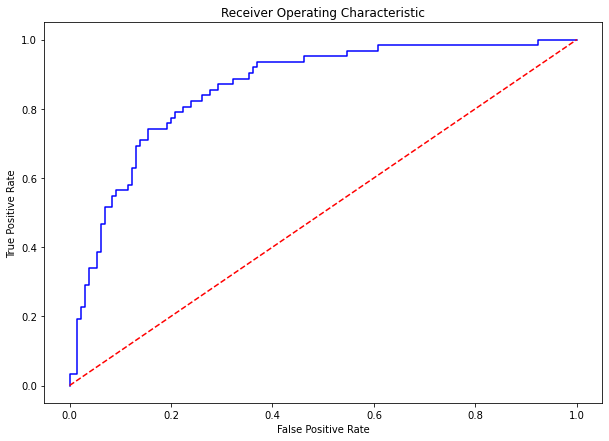

In [27]:
plt.figure(figsize=(10,7))
fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,color='blue')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()